In [1]:
#cars and trucks dataset with transfer learning

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kshitij192/cars-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 36.3M/36.3M [00:00<00:00, 81.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3


In [2]:
import os
for item in os.listdir(path):
  print(item)

Cars Dataset


In [3]:
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in{dirpath}")

There are 1 directories and 0 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3
There are 2 directories and 0 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset
There are 7 directories and 0 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/train
There are 0 directories and 316 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/train/Mahindra Scorpio
There are 0 directories and 775 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/train/Toyota Innova
There are 0 directories and 424 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/train/Swift
There are 0 directories and 271 images in/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/train/Hyundai Creta
There are 0 directories and 441 images in/root/.c

In [4]:
train_dir = "/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/train"
test_dir = "/root/.cache/kagglehub/datasets/kshitij192/cars-image-dataset/versions/3/Cars Dataset/test"

In [5]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = "categorical",
    batch_size = 32
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = "categorical",
    batch_size = 32
)

Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names =np.array(sorted([item.name for item in data_dir.glob("*")]))

In [7]:
print(class_names) #here are all of the class names

['Audi' 'Hyundai Creta' 'Mahindra Scorpio' 'Rolls Royce' 'Swift'
 'Tata Safari' 'Toyota Innova']


In [8]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def show_random_image(target_dir):

    target_class = random.choice(class_names)
    target_folder = os.path.join(target_dir, target_class)
    if not os.path.exists(target_folder):
        return
    image_files = os.listdir(target_folder)
    if not image_files:
        return
    random_image = random.choice(image_files)
    img_path = os.path.join(target_folder, random_image)
    img = mpimg.imread(img_path)
    plt.title(target_class)
    plt.imshow(img)
    plt.axis("off")
    plt.show()





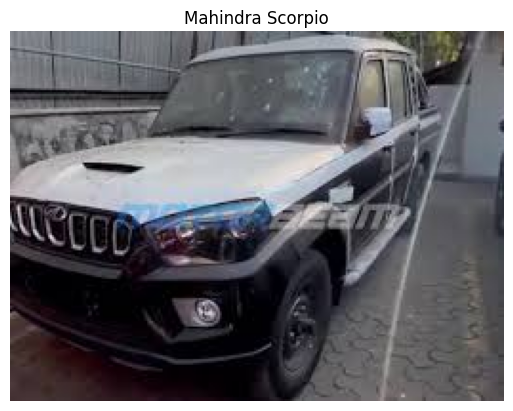

In [9]:
show_random_image(train_dir)

In [10]:
len(class_names)

7

In [11]:
train_data[0] #heres the first batch, 32 batches and 32 labels one hot encoded

(array([[[[202., 171.,  88.],
          [202., 171.,  88.],
          [202., 171.,  88.],
          ...,
          [229., 130.,  63.],
          [229., 130.,  63.],
          [229., 130.,  63.]],
 
         [[202., 175.,  88.],
          [202., 175.,  88.],
          [202., 175.,  88.],
          ...,
          [229., 130.,  63.],
          [229., 130.,  63.],
          [229., 130.,  63.]],
 
         [[202., 175.,  88.],
          [202., 175.,  88.],
          [202., 175.,  88.],
          ...,
          [229., 130.,  63.],
          [229., 130.,  63.],
          [229., 130.,  63.]],
 
         ...,
 
         [[128., 136., 149.],
          [128., 136., 149.],
          [128., 136., 149.],
          ...,
          [101., 143., 201.],
          [101., 143., 201.],
          [100., 142., 200.]],
 
         [[128., 136., 149.],
          [128., 136., 149.],
          [128., 136., 149.],
          ...,
          [101., 143., 201.],
          [101., 143., 201.],
          [100., 142., 200.

In [12]:
#set up transfer learning model
import tensorflow as tf
from tensorflow import keras

efficientnetb0 = keras.applications.EfficientNetB0(include_top = False,
                                                   input_shape = (224, 224, 3),
                                                   weights = "imagenet")

efficientnetb0.trainable = False

model_1 = tf.keras.Sequential([
    efficientnetb0,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(7, activation = "softmax")
]
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model_1.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.4759 - loss: 1.4620 - val_accuracy: 0.8093 - val_loss: 0.7259
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.8172 - loss: 0.6905 - val_accuracy: 0.8782 - val_loss: 0.5056
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.8768 - loss: 0.5016 - val_accuracy: 0.9041 - val_loss: 0.4113
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8987 - loss: 0.4085 - val_accuracy: 0.9127 - val_loss: 0.3564
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9181 - loss: 0.3442 - val_accuracy: 0.9200 - val_loss: 0.3135


In [14]:
class_names

array(['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce',
       'Swift', 'Tata Safari', 'Toyota Innova'], dtype='<U16')

In [17]:
#adjust the data to be only two of the classes

selected_classes = ["Audi", "Rolls Royce"]

train_datagen_binary = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_binary = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data_binary = train_datagen_binary.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    classes = selected_classes,
    class_mode = "binary"
)

test_data_binary = test_datagen_binary.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size = 32,
    classes = selected_classes,
    class_mode = "binary"
)


Found 1125 images belonging to 2 classes.
Found 273 images belonging to 2 classes.


In [19]:
model_2 = tf.keras.Sequential([
    efficientnetb0,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_2.fit(train_data_binary, epochs = 5, steps_per_epoch = len(train_data_binary),
            validation_data = test_data_binary, validation_steps = len(test_data_binary))

Epoch 1/5
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.5791 - loss: 0.6491

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 618ms/step - accuracy: 0.5844 - loss: 0.6447 - val_accuracy: 0.7766 - val_loss: 0.4536
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.7939 - loss: 0.4368 - val_accuracy: 0.8352 - val_loss: 0.3631
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8549 - loss: 0.3450 - val_accuracy: 0.9011 - val_loss: 0.3073
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9130 - loss: 0.2913 - val_accuracy: 0.9158 - val_loss: 0.2704
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9308 - loss: 0.2642 - val_accuracy: 0.9231 - val_loss: 0.2435
